In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("data.csv")
data = data.replace(u'\xa0', u'', regex=True)
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214125 entries, 0 to 214124
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  214125 non-null  int64  
 1   Age         214125 non-null  float64
 2   Boobs       214125 non-null  float64
 3   Height      214125 non-null  float64
 4   Size        214125 non-null  float64
 5   Metro       188710 non-null  object 
 6   DateUpdate  214125 non-null  object 
 7   Weight      214125 non-null  float64
 8   Price_USD   214125 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.7+ MB


(   Unnamed: 0   Age  Boobs  Height  Size                              Metro  \
 0           0  27.0    3.0   173.0  46.0      Алтуфьево,Медведково,Отрадное   
 1           1  27.0    3.0   168.0  46.0                         Кунцевская   
 2           2  25.0    4.0   165.0  52.0  Кутузовская,Студенческая,Киевская   
 3           3  21.0    2.0   170.0  42.0                      Тимирязевская   
 4           4  35.0    4.0   180.0  46.0                      Проспект Мира   
 
    DateUpdate  Weight  Price_USD  
 0  07.09.2010    57.0       22.0  
 1  05.07.2010    65.0       30.0  
 2  24.10.2016    52.0      223.0  
 3  25.10.2006    60.0       22.0  
 4  27.12.2010    70.0       52.0  ,
 None)

In [14]:
cleaned_data = data.dropna()
assert cleaned_data.isnull().sum().sum() == 0

data.head()

Unnamed: 0   Age  Boobs  Height  Size                              Metro  \
0           0  27.0    3.0   173.0  46.0      Алтуфьево,Медведково,Отрадное   
1           1  27.0    3.0   168.0  46.0                         Кунцевская   
2           2  25.0    4.0   165.0  52.0  Кутузовская,Студенческая,Киевская   
3           3  21.0    2.0   170.0  42.0                      Тимирязевская   
4           4  35.0    4.0   180.0  46.0                      Проспект Мира   

   DateUpdate  Weight  Price_USD  
0  07.09.2010    57.0       22.0  
1  05.07.2010    65.0       30.0  
2  24.10.2016    52.0      223.0  
3  25.10.2006    60.0       22.0  
4  27.12.2010    70.0       52.0

In [2]:
cleaned_data = data.dropna()
assert cleaned_data.isnull().sum().sum() == 0

# Step 3: Descriptive statistics for 3 numerical fields: Age, Height, Price_USD
fields = ['Age', 'Boobs', 'Height', 'Size', 'Weight', 'Price_USD']

descriptive_stats = {}
for field in fields:
    descriptive_stats[field] = {
        'mean': cleaned_data[field].mean(),
        'median': cleaned_data[field].median(),
        'std_dev': cleaned_data[field].std()
    }
descriptive_stats

{'Age': {'mean': np.float64(26.896841714800487),
  'median': np.float64(25.0),
  'std_dev': np.float64(6.629347033896341)},
 'Boobs': {'mean': np.float64(2.681537809337078),
  'median': np.float64(2.0),
  'std_dev': np.float64(1.184169019246746)},
 'Height': {'mean': np.float64(169.09212018440994),
  'median': np.float64(170.0),
  'std_dev': np.float64(4.969663296867548)},
 'Size': {'mean': np.float64(44.082120714323565),
  'median': np.float64(44.0),
  'std_dev': np.float64(2.6299970715452967)},
 'Weight': {'mean': np.float64(56.48129934820624),
  'median': np.float64(55.0),
  'std_dev': np.float64(8.371515526133392)},
 'Price_USD': {'mean': np.float64(55.68028191404801),
  'median': np.float64(45.0),
  'std_dev': np.float64(50.55164615552695)}}

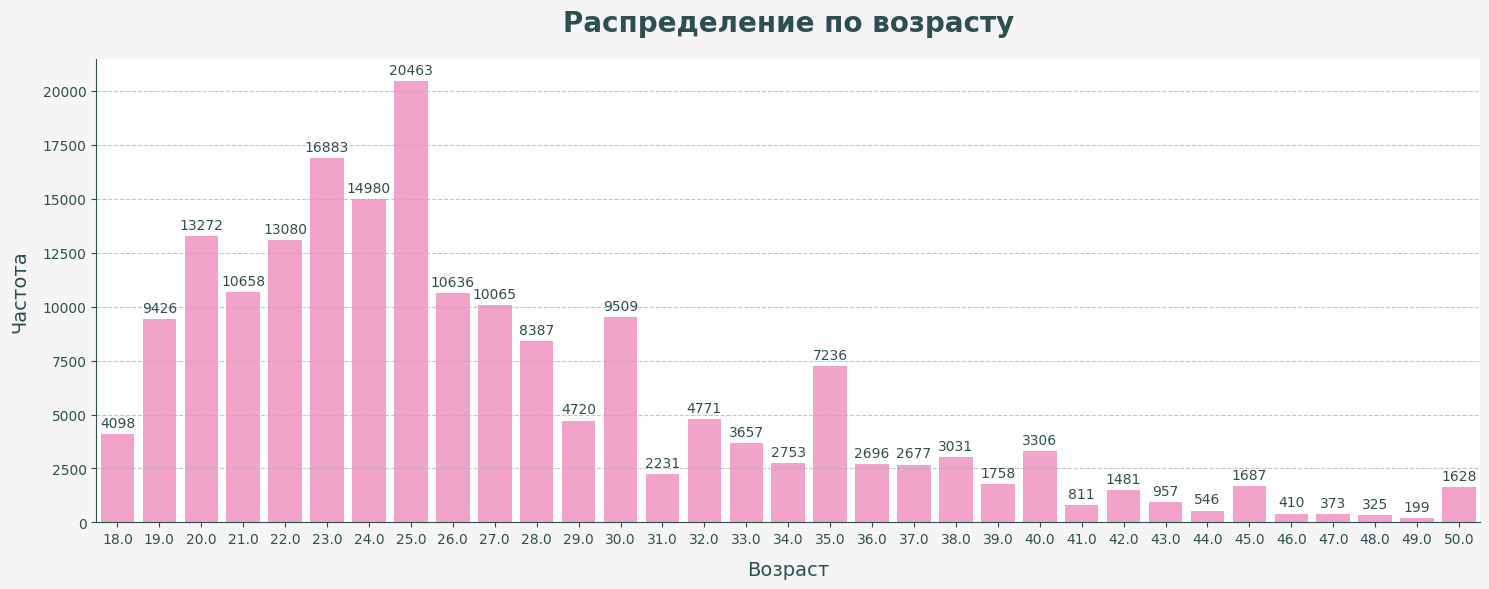

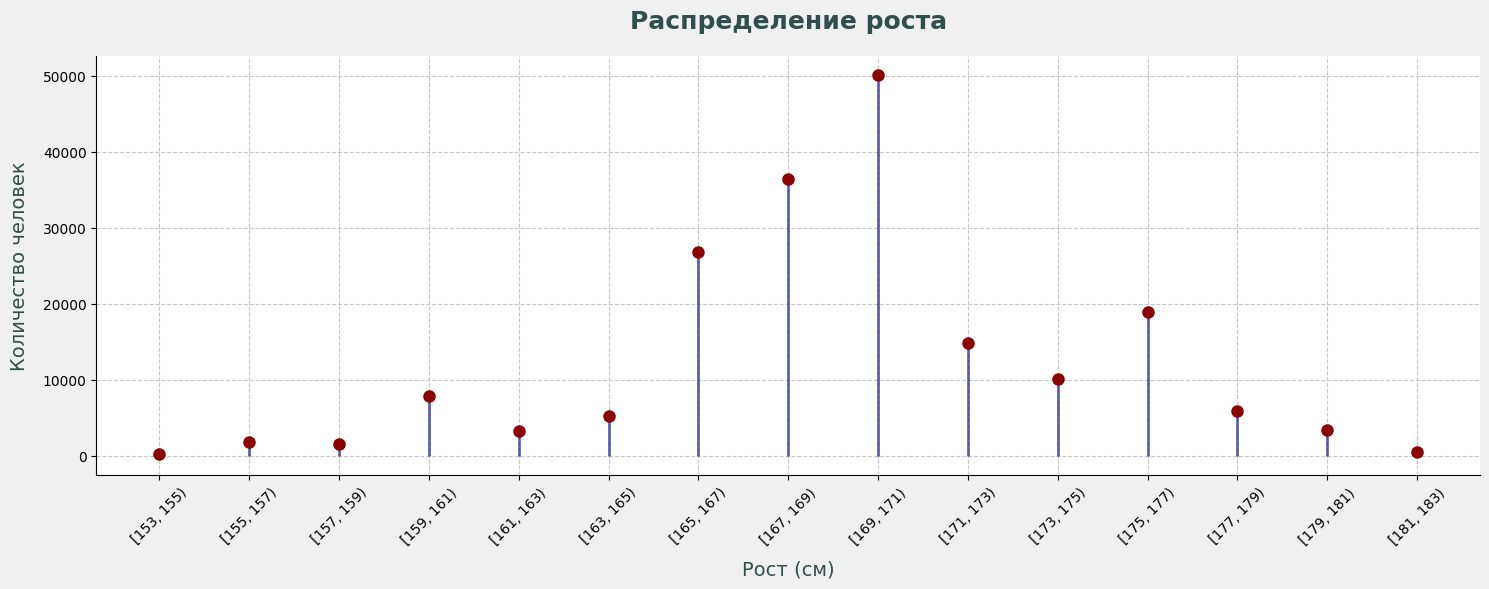

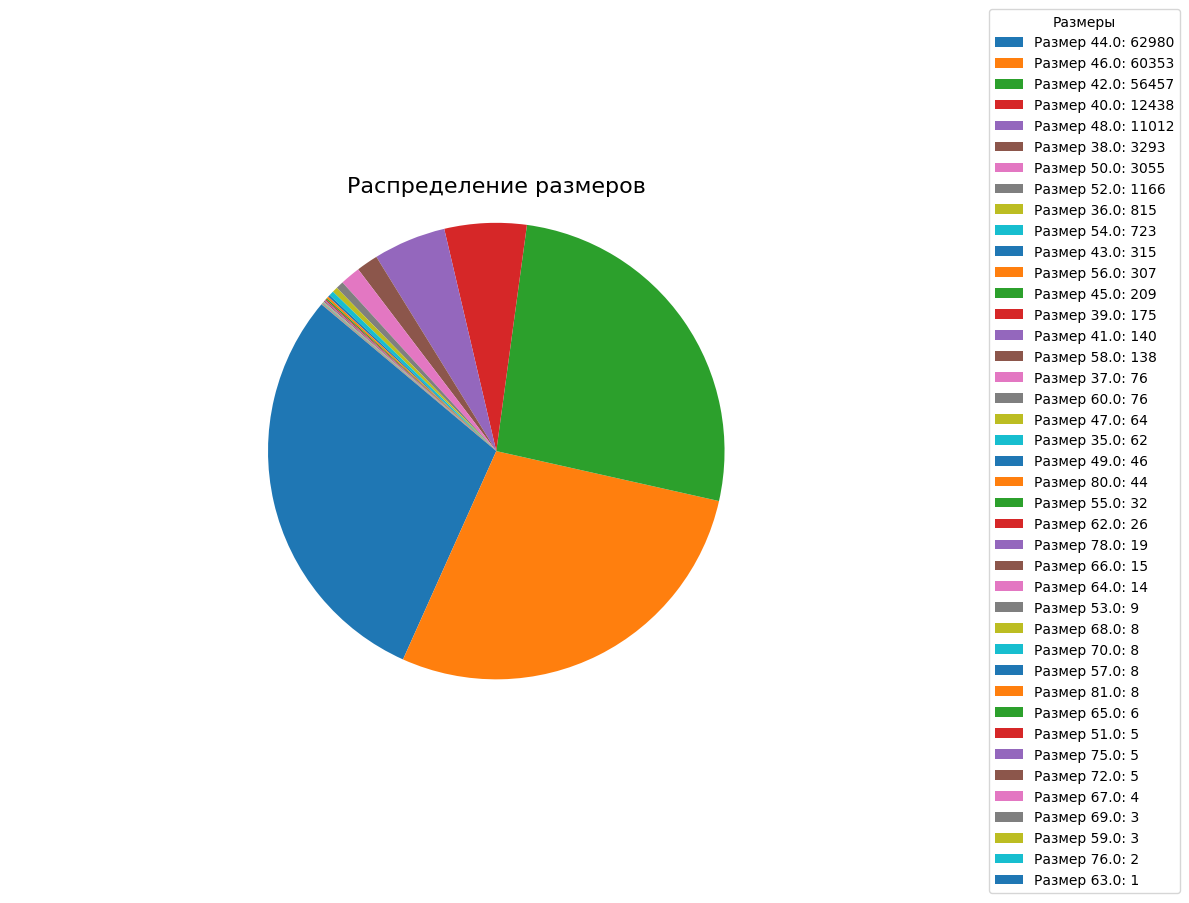

In [14]:
plt.figure(figsize=(15, 6), facecolor='#f5f5f5')

# Изменили цвет столбиков на розовый
ax = sns.countplot(x='Age', 
                  data=cleaned_data,
                  color='#FF69B4',  # Розовый цвет
                  alpha=0.7)        

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Распределение по возрасту', 
         fontsize=20, 
         pad=20, 
         fontweight='bold',
         color='#2f4f4f')

plt.xlabel('Возраст', 
         fontsize=14, 
         labelpad=10,
         color='#2f4f4f')

plt.ylabel('Частота', 
         fontsize=14,
         labelpad=10,
         color='#2f4f4f')

ax.spines['top'].set_visible(False)    
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_color('#2f4f4f') 
ax.spines['bottom'].set_color('#2f4f4f')

for i in ax.containers:
    ax.bar_label(i, padding=3, color='#2f4f4f')

ax.set_facecolor('white')
plt.tick_params(colors='#2f4f4f')

plt.tight_layout()
plt.show()


height_bins = pd.cut(cleaned_data['Height'], bins=range(153, 185, 2), right=False)

# Получаем количество людей в каждом интервале
height_counts = height_bins.value_counts().sort_index()

# Создаем более привлекательный stem plot
plt.figure(figsize=(15, 6), facecolor='#f0f0f0')
plt.grid(True, linestyle='--', alpha=0.7)

# Настраиваем цвета и стиль
markerline, stemlines, baseline = plt.stem(
    height_counts.index.astype(str), 
    height_counts, 
    basefmt=" ",
    linefmt='darkblue',
    markerfmt='o'
)

# Настройка элементов графика
plt.setp(markerline, color='darkred', markersize=8)
plt.setp(stemlines, linewidth=2, alpha=0.6)

# Улучшенное оформление заголовка и меток
plt.title('Распределение роста', 
          fontsize=18, 
          pad=20, 
          fontweight='bold', 
          color='#2f4f4f')
plt.xlabel('Рост (см)', 
          fontsize=14, 
          labelpad=10, 
          color='#2f4f4f')
plt.ylabel('Количество человек', 
          fontsize=14, 
          labelpad=10, 
          color='#2f4f4f')

# Настройка фона и границ
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Поворот меток оси X для лучшей читаемости
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


size_counts = data['Size'].value_counts().to_dict()  # Преобразуем в словарь
sizes = list(size_counts.keys())
counts = list(size_counts.values())

# Создание круговой диаграммы
plt.figure(figsize=(12, 8))  # Увеличим ширину для размещения легенды
plt.pie(counts, startangle=140)  # Убрали параметр autopct
plt.title('Распределение размеров', fontsize=16)
plt.legend(title="Размеры", 
          labels=[f'Размер {size}: {count}' for size, count in zip(sizes, counts)],
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.tight_layout()  # Автоматически настроит расположение элементов
plt.show()



/var/folders/r0/k68mbzkd1b73fv1l_j7y40yw0000gn/T/ipykernel_74390/623471226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", y="Boobs",


<Figure size 1600x500 with 0 Axes>

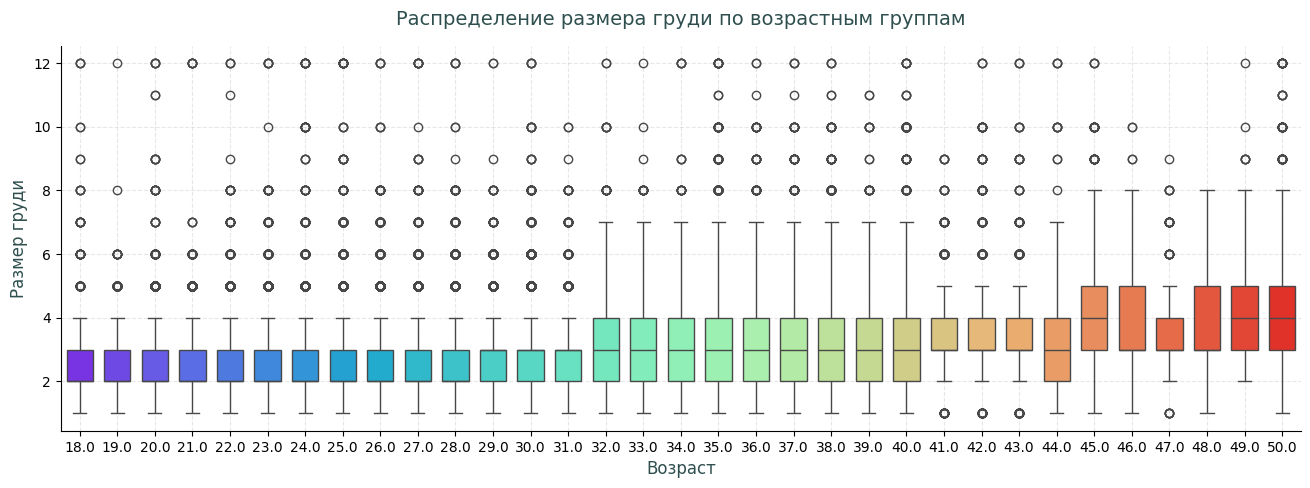

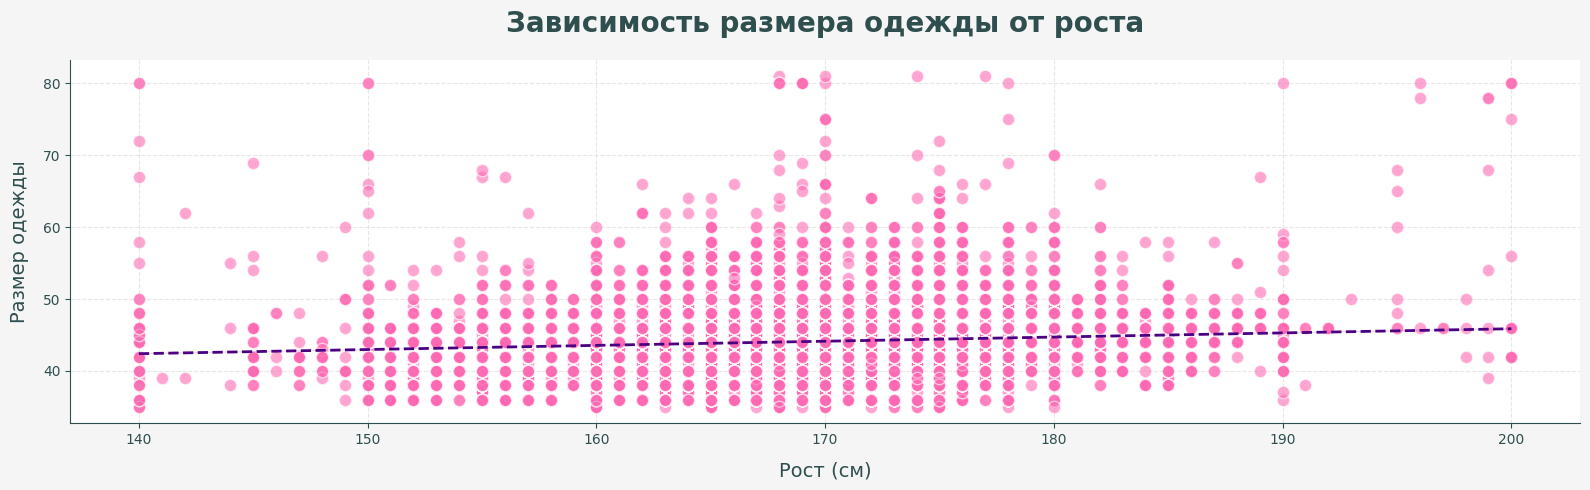

In [18]:

plt.figure(figsize=(16, 5)) # Create a single figure

# ... existing code ...

plt.figure(figsize=(16, 5))
sns.boxplot(x="Age", y="Boobs", 
            data=cleaned_data,
            palette="rainbow",  # Добавляем радужную палитру
            width=0.7)         # Регулируем ширину боксов

plt.title("Распределение размера груди по возрастным группам", 
          fontsize=14, 
          pad=15,
          color='#2f4f4f')

plt.xlabel("Возраст", fontsize=12, color='#2f4f4f')
plt.ylabel("Размер груди", fontsize=12, color='#2f4f4f')

# Улучшаем внешний вид
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)



# Plot 2: Scatter plot with regression line
plt.figure(figsize=(16, 5), facecolor='#f5f5f5')

# Создаем график регрессии с улучшенным дизайном
sns.regplot(x="Height", y="Size", 
            data=cleaned_data,
            scatter_kws={
                "s": 80,                    # Увеличенный размер точек
                "color": "#FF69B4",         # Розовый цвет точек
                "alpha": 0.6,               # Прозрачность точек
                "edgecolor": "white"        # Белая окантовка точек
            },
            line_kws={
                "color": "#4B0082",         # Индиго цвет линии регрессии
                "linewidth": 2,             # Толщина линии
                "linestyle": "--"           # Пунктирная линия
            })

# Улучшаем оформление
plt.title("Зависимость размера одежды от роста", 
          fontsize=20, 
          pad=20,
          fontweight='bold',
          color='#2f4f4f')

plt.xlabel("Рост (см)", 
          fontsize=14,
          labelpad=10,
          color='#2f4f4f')

plt.ylabel("Размер одежды", 
          fontsize=14,
          labelpad=10,
          color='#2f4f4f')

# Настройка сетки и фона
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('white')

# Убираем верхнюю и правую границы графика
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#2f4f4f')
plt.gca().spines['bottom'].set_color('#2f4f4f')

# Настройка цвета делений на осях
plt.tick_params(colors='#2f4f4f')

plt.tight_layout()
plt.show()



In [96]:

import pandas as pd
import plotly.express as px

cleaned_data = data.dropna(subset=['Boobs', 'Price_USD'])
# Установка интервалов для цен до 1000 долларов с шагом 100
price_bins = pd.cut(cleaned_data['Price_USD'], bins=range(0, 601, 100), right=False)
cleaned_data['Price_Bins'] = price_bins.astype(str)

# Построение гистограммы с учетом размера груди
fig = px.histogram(cleaned_data, x='Price_Bins', color='Boobs',
                     title='Распределение цен до 1000 долларов в зависимости от размера Boobs',
                     labels={'Price_Bins': 'Цена (USD)', 'Boobs': 'Размер Boobs'}
                    )
fig.update_layout(xaxis_title='Цена (USD)', yaxis_title='Количество')
fig.show()



In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Удаляем столбец "Metro" из DataFrame
df_cleaned = data.drop(columns=['Metro'])

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X = df_cleaned[['Age', 'Boobs', 'Height', 'Size', 'Weight']]
Y = df_cleaned['Price_USD']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создаем модель
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучаем модель
model.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test)

# Функция для предсказания цены
def predict_price(age, boobs, height, size, weight):
    features_input = np.array([[age, boobs, height, size, weight]])
    price = model.predict(features_input)
    return price[0]

# Пример использования
age = int(input())
boobs = int(input())
height = int(input())
size = int(input())
weight = int(input())
predicted_price = predict_price(age, boobs, height, size, weight)
print("Predicted Price:", predicted_price)


Predicted Price: 140.1145238095238


/Users/yanapls/PycharmProjects/PythonProject8/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [105]:
data['Salary'] = data['Price_USD'] * 22
data['Before Retirement'] = 58 - data['Age']
# Проверка результата (вывод первых 5 строк)
print(data.head())

data.to_csv('new_data.csv', index=False)

   Unnamed: 0   Age  Boobs  Height  Size                              Metro  \
0           0  27.0    3.0   173.0  46.0      Алтуфьево,Медведково,Отрадное   
1           1  27.0    3.0   168.0  46.0                         Кунцевская   
2           2  25.0    4.0   165.0  52.0  Кутузовская,Студенческая,Киевская   
3           3  21.0    2.0   170.0  42.0                      Тимирязевская   
4           4  35.0    4.0   180.0  46.0                      Проспект Мира   

   DateUpdate  Weight  Price_USD  Salary  Before Retirement  
0  07.09.2010    57.0       22.0   484.0               31.0  
1  05.07.2010    65.0       30.0   660.0               31.0  
2  24.10.2016    52.0      223.0  4906.0               33.0  
3  25.10.2006    60.0       22.0   484.0               37.0  
4  27.12.2010    70.0       52.0  1144.0               23.0  
